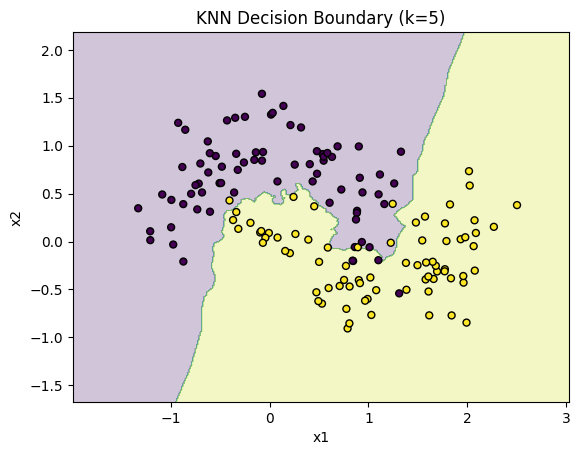

Test accuracy: 0.9467


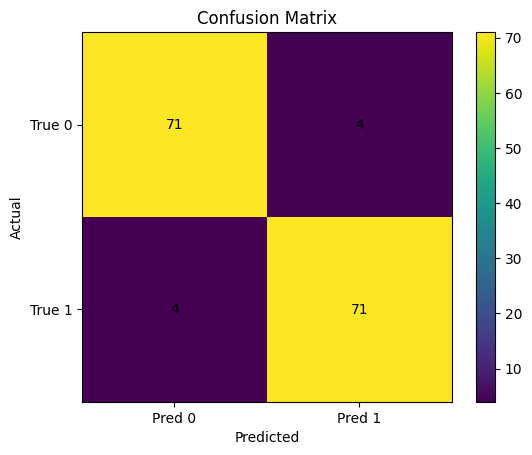

In [1]:
# Simple KNN classification with visualization (decision boundary + confusion matrix)
# pip install scikit-learn matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) 2D data so we can visualize the boundary
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 2) Train KNN (try k = 1, 3, 5, 7, 11...)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 3) Decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=25, edgecolors="k")
plt.xlabel("x1"); plt.ylabel("x2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()

# 4) Accuracy + Confusion Matrix
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

plt.figure()
plt.imshow(cm, interpolation="nearest")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.xticks([0, 1], ["Pred 0", "Pred 1"])
plt.yticks([0, 1], ["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()
